<a href="https://colab.research.google.com/github/viveksahukar/eip/blob/master/eip_assignment_depth_conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

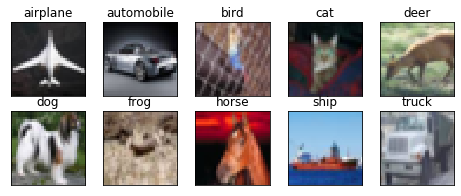

In [57]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [61]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [62]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_27 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_28 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_186 (Dropout)        (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 96)      

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


In [0]:


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  """


Epoch 1/50
390/390 [==============================] - 18s 45ms/step - loss: 1.8747 - acc: 0.2775 - val_loss: 1.4797 - val_acc: 0.4600
Epoch 2/50
390/390 [==============================] - 8s 20ms/step - loss: 1.3741 - acc: 0.5003 - val_loss: 1.1568 - val_acc: 0.5809
Epoch 3/50
390/390 [==============================] - 8s 20ms/step - loss: 1.1302 - acc: 0.5978 - val_loss: 0.9553 - val_acc: 0.6613
Epoch 4/50
390/390 [==============================] - 8s 20ms/step - loss: 0.9918 - acc: 0.6513 - val_loss: 0.8520 - val_acc: 0.7032
Epoch 5/50
390/390 [==============================] - 8s 20ms/step - loss: 0.8913 - acc: 0.6896 - val_loss: 0.7643 - val_acc: 0.7347
Epoch 6/50
390/390 [==============================] - 8s 20ms/step - loss: 0.8081 - acc: 0.7239 - val_loss: 0.7498 - val_acc: 0.7417
Epoch 7/50
390/390 [==============================] - 8s 21ms/step - loss: 0.7630 - acc: 0.7383 - val_loss: 0.7313 - val_acc: 0.7551
Epoch 8/50
390/390 [==============================] - 8s 21ms/step -

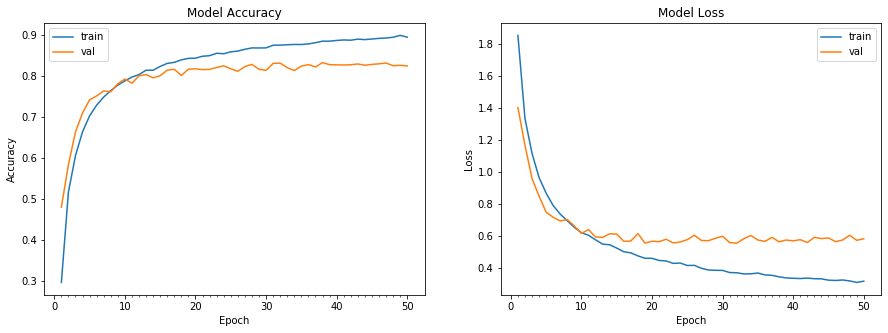

Accuracy on test data is: 82.45


In [0]:
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
# Define the model

# (Output size, receptive field) mentioned in tuple form after adding each layer as comment.

model_2 = Sequential()
model_2.add(SeparableConv2D(48, 3, 3, activation='relu', input_shape=(32, 32, 3))) # (30, 3)
model_2.add(BatchNormalization())
model_2.add(Dropout(0.1))

model_2.add(SeparableConv2D(48, 3, 3, activation='relu')) # (28, 5)
model_2.add(BatchNormalization())
model_2.add(Dropout(0.1))


model_2.add(MaxPooling2D(pool_size=(2, 2))) # (14, 6)
model_2.add(BatchNormalization())
model_2.add(Dropout(0.1))

model_2.add(SeparableConv2D(96, 3, 3, activation='relu')) # (12, 9)
model_2.add(BatchNormalization())
model_2.add(Dropout(0.1))

model_2.add(SeparableConv2D(96, 3, 3, activation='relu')) # (10, 13)
model_2.add(BatchNormalization())
model_2.add(Dropout(0.1))

model_2.add(MaxPooling2D(pool_size=(2, 2))) # (5, 15)
model_2.add(BatchNormalization())
model_2.add(Dropout(0.1))

model_2.add(SeparableConv2D(192, 3, 3, activation='relu')) # (3, 19)
model_2.add(BatchNormalization())
model_2.add(Dropout(0.1))

model_2.add(SeparableConv2D(192, 3, 3, activation='relu')) # (1, 27)
model_2.add(BatchNormalization())
model_2.add(Dropout(0.1))


model_2.add(SeparableConv2D(num_classes, 1, 1, activation='relu')) # (10, 27)
model_2.add(BatchNormalization())



model_2.add(Flatten())
model_2.add(Activation('softmax')) #(10, 27)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=2, min_lr=0.1e-6)

# Compile the model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), activation="relu", input_shape=(32, 32, 3...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launche

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_46 (Separab (None, 30, 30, 48)        219       
_________________________________________________________________
batch_normalization_47 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
dropout_46 (Dropout)         (None, 30, 30, 48)        0         
_________________________________________________________________
separable_conv2d_47 (Separab (None, 28, 28, 48)        2784      
_________________________________________________________________
batch_normalization_48 (Batc (None, 28, 28, 48)        192       
_________________________________________________________________
dropout_47 (Dropout)         (None, 28, 28, 48)        0         
_________________________________________________________________
separable_conv2d_48 (Separab (None, 13, 13, 48)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(10, (1, 1), activation="relu")`


In [0]:
# train the model
start = time.time()
# Train the model
model_2_info = model_2.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  """


Epoch 1/50
390/390 [==============================] - 24s 61ms/step - loss: 1.9092 - acc: 0.3131 - val_loss: 1.5571 - val_acc: 0.4381
Epoch 2/50
390/390 [==============================] - 19s 48ms/step - loss: 1.4571 - acc: 0.4882 - val_loss: 1.3414 - val_acc: 0.5361
Epoch 3/50
390/390 [==============================] - 19s 48ms/step - loss: 1.2576 - acc: 0.5621 - val_loss: 1.4509 - val_acc: 0.5255
Epoch 4/50
390/390 [==============================] - 19s 48ms/step - loss: 1.1295 - acc: 0.6098 - val_loss: 1.0584 - val_acc: 0.6342
Epoch 5/50
390/390 [==============================] - 19s 49ms/step - loss: 1.0317 - acc: 0.6446 - val_loss: 1.0186 - val_acc: 0.6493
Epoch 6/50
390/390 [==============================] - 19s 49ms/step - loss: 0.9488 - acc: 0.6741 - val_loss: 0.9262 - val_acc: 0.6823
Epoch 7/50
390/390 [==============================] - 19s 49ms/step - loss: 0.8897 - acc: 0.6948 - val_loss: 0.9720 - val_acc: 0.6662
Epoch 8/50
390/390 [==============================] - 19s 48ms